# 1. Hello World Agent


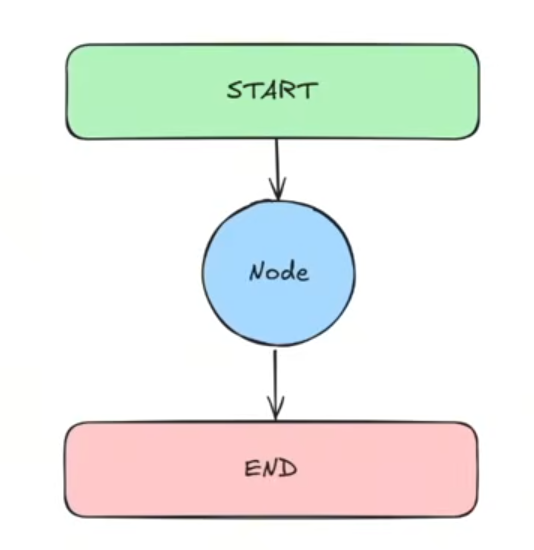

In [3]:
from typing import Dict, TypedDict, Optional
from langgraph.graph import StateGraph

In [4]:
class AgentState(TypedDict):    # our state schema
    message: str

def greeting_node(state: AgentState) -> AgentState:
    """Simple node that adds a greeting message to the state"""

    state['message'] = f"Hey {state['message']} how is your day going?"

    return state

In [5]:
graph = StateGraph(AgentState)

graph.add_node("greeter", greeting_node)

graph.set_entry_point("greeter")     # = add_edge(START, key)
graph.set_finish_point("greeter")

app = graph.compile()

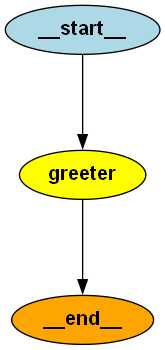

In [6]:
from IPython.display import Image, display 

display(Image(app.get_graph().draw_png()))

In [7]:
result = app.invoke({"message": "Bob"})
result["message"]

'Hey Bob how is your day going?'

## 2. Exercise

In [12]:
from typing import Optional

class ComplimentaryAgent_State(TypedDict):
    name: str
    # message: Optional[str]
    message: str


def compliment_student(state: ComplimentaryAgent_State) -> ComplimentaryAgent_State:
    name = state['name']
    state['message'] = f"{name}, your're doing an amazing job learning LangGraph"

    return state

# init state - graph 
graph = StateGraph(ComplimentaryAgent_State)

# add node
graph.add_node("compliment", compliment_student)

# add edge
graph.set_entry_point("compliment")
graph.set_finish_point("compliment")

app = graph.compile()

In [13]:
result = app.invoke({"name": "Bob",})

result['message']

"Bob, your're doing an amazing job learning LangGraph"